In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

deliveries = pd.read_csv("/content/cleaned_deliveries.csv")
matches = pd.read_csv("/content/cleaned_matches (1).csv")

In [3]:
batting_stats = deliveries.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x==4).sum()),
    sixes=('batsman_runs', lambda x: (x==6).sum()),
    dismissals=('player_dismissed', lambda x: x.notnull().sum())
).reset_index()

In [4]:
batting_stats['strike_rate'] = (batting_stats['runs_scored'] / batting_stats['balls_faced']) * 100
batting_stats['batting_average'] = batting_stats['runs_scored'] / batting_stats['dismissals'].replace(0, 1)
batting_stats['boundary_percentage'] = ((batting_stats['fours'] + batting_stats['sixes']) / batting_stats['balls_faced']) * 100

In [7]:
features = ['strike_rate', 'batting_average', 'boundary_percentage']
X = batting_stats[features]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
linked = linkage(X_scaled, method='ward')

In [13]:
batting_stats['Hierarchical_Cluster'] = fcluster(linked, t=3, criterion='maxclust')

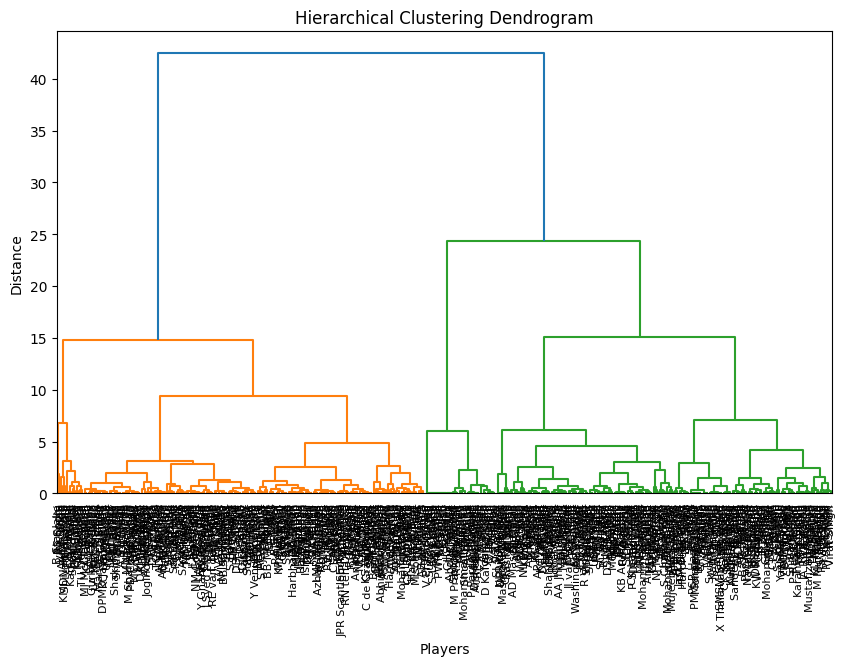

In [12]:
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=batting_stats['batter'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.show()